Análisis Exploratorio de Datos "Hackaton 2025 UTP"

Análisis del Dataset y Exploración inicial del Dataset de Talento Tech.

In [ ]:
### Empezamos importando las librerias necesarias para el análisis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Librería de visualización
import plotly.express as px
# Librería de la que obtendremos los datos
import sklearn.datasets as dts
# Librería con la que manejaremos los datos
import pandas as pd

importación del Dataset del Trabajo

In [ ]:
base_datos_inicial = pd.read_csv('/content/Dataset_Talento (1).csv')
base_datos_inicial


,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-01-01 00:00:00,Noche,OP_16,M_8,P_14,74.200401,NaN,45.209387,106.356684,No,NaN,108,3,87.021704,13.131580,0,1,NaN
1,2023-01-01 01:00:00,Mañana,OP_18,M_8,P_12,85.886727,0.481294,52.623286,106.147220,Sí,Eléctrico,86,2,81.200758,13.348221,0,0,NaN
2,2023-01-01 02:00:00,Noche,OP_5,M_7,P_14,81.293588,0.446638,48.538203,122.517733,No,NaN,103,0,79.104477,15.461715,3,0,Operación normal
3,2023-01-01 03:00:00,Noche,OP_4,M_6,P_15,75.697975,0.576969,55.597781,123.641235,No,NaN,104,2,84.176537,16.156453,4,0,NaN
4,2023-01-01 04:00:00,Mañana,OP_13,M_6,P_7,69.887504,0.716240,63.837428,126.276992,No,NaN,119,1,93.535084,12.573939,0,0,Operación normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-09-07 19:00:00,Mañana,OP_7,M_9,P_2,69.566198,0.359394,31.452299,110.456904,No,NaN,85,6,83.359399,17.467713,1,0,NaN
5996,2023-09-07 20:00:00,Tarde,OP_16,M_9,P_1,72.509325,0.387216,45.429609,145.575235,No,NaN,109,4,87.847138,11.850616,0,0,NaN
5997,2023-09-07 21:00:00,Noche,OP_3,M_7,P_11,72.452851,0.551448,27.774960,74.620786,No,NaN,109,0,NaN,NaN,1,1,Revisar calibración
5998,2023-09-07 22:00:00,Tarde,OP_7,M_6,P_1,74.236404,0.429883,41.528769,111.656062,No,NaN,101,3,87.225639,17.073040,0,0,NaN


In [ ]:
## revisión de información general
base_datos_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibración              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  tipo_fallo             599 non-null    object 
 11  cantidad_producida     6000 non-null   int64  
 12  unidades_defectuosas   6000 non-null   int64  
 13  eficiencia_porcentual  5820 non-null   float64
 14  consumo_energia        5820 non-null   float64
 15  para

ENCONTRAR Y MANEJAR DATOS FALTANTES

In [ ]:
base_datos_inicial.isnull().sum()  #### encontramos datos faltantes en cada una de las variables.

,0
timestamp,0
turno,0
operador_id,0
maquina_id,0
producto_id,0
temperatura,0
vibración,180
humedad,180
tiempo_ciclo,180
fallo_detectado,0


Manejo de imputación de Datos faltantes por variables

In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["vibración"]=base_datos_inicial["vibración"].fillna(base_datos_inicial["vibración"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura                 0
vibración                   0
humedad                   180
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual     180
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["humedad"]=base_datos_inicial["humedad"].fillna(base_datos_inicial["humedad"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura                 0
vibración                   0
humedad                     0
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual     180
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["tiempo_ciclo"]=base_datos_inicial["tiempo_ciclo"].fillna(base_datos_inicial["tiempo_ciclo"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibración                 180
humedad                   180
tiempo_ciclo                0
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual       0
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
### conteo de fallos en la columna tipo de fallo.
base_datos_inicial["tipo_fallo"].value_counts()

,count
tipo_fallo,
Mecánico,294
Eléctrico,192
Otro,113


In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["eficiencia_porcentual"]=base_datos_inicial["eficiencia_porcentual"].fillna(base_datos_inicial["eficiencia_porcentual"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibración                 180
humedad                   180
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual       0
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["consumo_energia"]=base_datos_inicial["consumo_energia"].fillna(base_datos_inicial["consumo_energia"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibración                 180
humedad                   180
tiempo_ciclo                0
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual       0
consumo_energia             0
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["temperatura"]=base_datos_inicial["temperatura"].fillna(base_datos_inicial["temperatura"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura                 0
vibración                 180
humedad                   180
tiempo_ciclo                0
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual       0
consumo_energia             0
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
## MANEJO DATOS FALTANTES POR VARIABLE
base_datos_inicial["vibración"]=base_datos_inicial["vibración"].fillna(base_datos_inicial["vibración"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura                 0
vibración                   0
humedad                   180
tiempo_ciclo                0
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual       0
consumo_energia             0
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
base_datos_inicial["humedad"]=base_datos_inicial["humedad"].fillna(base_datos_inicial["humedad"].mean())
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura                 0
vibración                   0
humedad                     0
tiempo_ciclo                0
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual       0
consumo_energia             0
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


In [ ]:
base_datos_inicial.dropna(inplace=True) ### no hay valores nulos en los datos
base_datos_inicial
print("Valores nulos antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores nulos antes de la imputación
timestamp                0
turno                    0
operador_id              0
maquina_id               0
producto_id              0
temperatura              0
vibración                0
humedad                  0
tiempo_ciclo             0
fallo_detectado          0
tipo_fallo               0
cantidad_producida       0
unidades_defectuosas     0
eficiencia_porcentual    0
consumo_energia          0
paradas_programadas      0
paradas_imprevistas      0
observaciones            0
dtype: int64


In [ ]:
### datos duplicados en el dataframe :
base_datos_inicial[base_datos_inicial.duplicated(keep=False)]
print("Valores duplicados antes de la imputación")
print(base_datos_inicial.isnull().sum())

Valores duplicados antes de la imputación
timestamp                0
turno                    0
operador_id              0
maquina_id               0
producto_id              0
temperatura              0
vibración                0
humedad                  0
tiempo_ciclo             0
fallo_detectado          0
tipo_fallo               0
cantidad_producida       0
unidades_defectuosas     0
eficiencia_porcentual    0
consumo_energia          0
paradas_programadas      0
paradas_imprevistas      0
observaciones            0
dtype: int64


DATOS PREPARADOS PARA EL ANALISIS EXPLORATORIO

In [ ]:
DATOS_PREPARADOS=base_datos_inicial
DATOS_PREPARADOS

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
8,2023-01-01 08:00:00,Noche,OP_11,M_1,P_6,81.380521,0.502242,39.360716,139.671017,No,Mecánico,101,0,90.094146,13.285916,1,0,Revisar calibración
47,2023-01-02 23:00:00,Mañana,OP_10,M_7,P_12,71.733040,0.434832,41.546897,101.217782,No,Mecánico,91,6,90.231549,15.107694,2,1,Operación normal
67,2023-01-03 19:00:00,Tarde,OP_15,M_1,P_14,77.188340,0.476265,44.964716,119.308616,No,Eléctrico,106,2,79.347733,14.965378,0,0,Revisar calibración
72,2023-01-04 00:00:00,Tarde,OP_4,M_9,P_12,74.708903,0.537974,29.949926,119.942928,No,Mecánico,96,0,80.477832,12.942259,1,2,Revisar calibración
84,2023-01-04 12:00:00,Mañana,OP_10,M_7,P_4,80.834994,0.576273,56.250750,119.912532,No,Mecánico,96,1,85.817104,17.758448,0,1,Ruido inusual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,2023-08-31 00:00:00,Noche,OP_15,M_6,P_4,77.630797,0.307257,25.783895,111.261947,No,Mecánico,95,1,89.523489,16.709044,1,1,Revisar calibración
5889,2023-09-03 09:00:00,Mañana,OP_8,M_4,P_6,81.237055,0.485973,46.410759,112.437936,No,Otro,79,1,92.187103,14.624282,1,1,Revisar calibración
5920,2023-09-04 16:00:00,Noche,OP_4,M_3,P_6,77.188754,0.456121,39.517362,127.507437,No,Eléctrico,107,0,87.425201,18.458644,1,0,Revisar calibración
5938,2023-09-05 10:00:00,Tarde,OP_5,M_2,P_2,76.101879,0.406859,56.733476,105.419095,No,Mecánico,112,4,84.305696,15.842751,1,0,Operación normal


In [ ]:
### se revisa de nuevo el tipo de dato

DATOS_PREPARADOS.info()


<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 8 to 5978
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              174 non-null    object 
 1   turno                  174 non-null    object 
 2   operador_id            174 non-null    object 
 3   maquina_id             174 non-null    object 
 4   producto_id            174 non-null    object 
 5   temperatura            174 non-null    float64
 6   vibración              174 non-null    float64
 7   humedad                174 non-null    float64
 8   tiempo_ciclo           174 non-null    float64
 9   fallo_detectado        174 non-null    object 
 10  tipo_fallo             174 non-null    object 
 11  cantidad_producida     174 non-null    int64  
 12  unidades_defectuosas   174 non-null    int64  
 13  eficiencia_porcentual  174 non-null    float64
 14  consumo_energia        174 non-null    float64
 15  paradas_pr

In [ ]:
## MANEJO DE LA VARIABLE TIMESTAP POR "fecha de Registro"
DATOS_PREPARADOS = DATOS_PREPARADOS.rename(columns={"timestamp": 'fecha_de_Registro'})
DATOS_PREPARADOS = DATOS_PREPARADOS.rename(columns={"operador_id": 'Identificación del operador'})
DATOS_PREPARADOS




,fecha_de_Registro,turno,Identificación del operador,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
8,2023-01-01 08:00:00,Noche,OP_11,M_1,P_6,81.380521,0.502242,39.360716,139.671017,No,Mecánico,101,0,90.094146,13.285916,1,0,Revisar calibración
47,2023-01-02 23:00:00,Mañana,OP_10,M_7,P_12,71.733040,0.434832,41.546897,101.217782,No,Mecánico,91,6,90.231549,15.107694,2,1,Operación normal
67,2023-01-03 19:00:00,Tarde,OP_15,M_1,P_14,77.188340,0.476265,44.964716,119.308616,No,Eléctrico,106,2,79.347733,14.965378,0,0,Revisar calibración
72,2023-01-04 00:00:00,Tarde,OP_4,M_9,P_12,74.708903,0.537974,29.949926,119.942928,No,Mecánico,96,0,80.477832,12.942259,1,2,Revisar calibración
84,2023-01-04 12:00:00,Mañana,OP_10,M_7,P_4,80.834994,0.576273,56.250750,119.912532,No,Mecánico,96,1,85.817104,17.758448,0,1,Ruido inusual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,2023-08-31 00:00:00,Noche,OP_15,M_6,P_4,77.630797,0.307257,25.783895,111.261947,No,Mecánico,95,1,89.523489,16.709044,1,1,Revisar calibración
5889,2023-09-03 09:00:00,Mañana,OP_8,M_4,P_6,81.237055,0.485973,46.410759,112.437936,No,Otro,79,1,92.187103,14.624282,1,1,Revisar calibración
5920,2023-09-04 16:00:00,Noche,OP_4,M_3,P_6,77.188754,0.456121,39.517362,127.507437,No,Eléctrico,107,0,87.425201,18.458644,1,0,Revisar calibración
5938,2023-09-05 10:00:00,Tarde,OP_5,M_2,P_2,76.101879,0.406859,56.733476,105.419095,No,Mecánico,112,4,84.305696,15.842751,1,0,Operación normal


Empezamos con el Análisis Exploratorio de Datos.

In [ ]:
### Análisis Estadístico de cada Variable

DATOS_PREPARADOS.describe()

,temperatura,vibración,humedad,tiempo_ciclo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,75.425669,0.504641,45.249032,122.848921,100.385057,1.994253,85.551719,15.689259,0.925287,0.431034
std,4.791748,0.097751,9.534339,20.196648,10.493378,1.366389,4.901937,2.883258,0.906077,0.648129
min,61.649157,0.258998,24.474374,69.621077,73.000000,0.000000,69.012685,8.507700,0.000000,0.000000
25%,72.368759,0.436462,39.379507,111.410186,94.000000,1.000000,82.109613,13.670696,0.000000,0.000000
50%,75.194192,0.502242,44.964716,122.038659,99.000000,2.000000,85.816898,15.459199,1.000000,0.000000
75%,78.586399,0.565402,50.639204,137.356196,108.000000,3.000000,88.928351,17.781946,1.000000,1.000000
max,87.728126,0.797865,80.425403,179.041736,128.000000,6.000000,98.851474,25.866977,5.000000,3.000000


Automatización del Describe para todas las Variables.

In [ ]:
# Usamos describe() para todas las variables
for col in DATOS_PREPARADOS.columns:
  print(col)
  print(DATOS_PREPARADOS[col].describe())
  print("____________________")

fecha_de_Registro
count                     174
unique                    174
top       2023-01-01 08:00:00
freq                        1
Name: fecha_de_Registro, dtype: object
____________________
turno
count       174
unique        3
top       Tarde
freq         66
Name: turno, dtype: object
____________________
Identificación del operador
count       174
unique       20
top       OP_15
freq         14
Name: Identificación del operador, dtype: object
____________________
maquina_id
count     174
unique     10
top       M_6
freq       24
Name: maquina_id, dtype: object
____________________
producto_id
count      174
unique      15
top       P_11
freq        16
Name: producto_id, dtype: object
____________________
temperatura
count    174.000000
mean      75.425669
std        4.791748
min       61.649157
25%       72.368759
50%       75.194192
75%       78.586399
max       87.728126
Name: temperatura, dtype: float64
____________________
vibración
count    174.000000
mean       0.504641

Gráficos de Variables de Datos

In [ ]:
### Diagramas de Cajas y Bigotes para la observación de las variables concretas.

# Diagrama de caja y bigote
fig = px.box(DATOS_PREPARADOS, y="temperatura")
fig.show()

In [ ]:
# Obtenemos el diagrama de caja para todas las variables
for e in DATOS_PREPARADOS.columns:
  fig = px.box(DATOS_PREPARADOS, y=e, points="all")
  fig.show()

Variable a Predecir

In [ ]:
## importación de librerias de escalado

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
### APLICACIÓN DE NORMALIZACIÓN A LAS VARIABLES OBJETIVO

scaler_norm = MinMaxScaler()
DATOS_PREPARADOS[['consumo_energia']] = scaler_norm.fit_transform(DATOS_PREPARADOS[['consumo_energia']])
DATOS_PREPARADOS




,fecha_de_Registro,turno,Identificación del operador,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
8,2023-01-01 08:00:00,Noche,OP_11,M_1,P_6,0.756601,0.502242,39.360716,139.671017,No,Mecánico,101,0,90.094146,0.275254,1,0,Revisar calibración
47,2023-01-02 23:00:00,Mañana,OP_10,M_7,P_12,0.386667,0.434832,41.546897,101.217782,No,Mecánico,91,6,90.231549,0.380200,2,1,Operación normal
67,2023-01-03 19:00:00,Tarde,OP_15,M_1,P_14,0.595851,0.476265,44.964716,119.308616,No,Eléctrico,106,2,79.347733,0.372002,0,0,Revisar calibración
72,2023-01-04 00:00:00,Tarde,OP_4,M_9,P_12,0.500777,0.537974,29.949926,119.942928,No,Mecánico,96,0,80.477832,0.255458,1,2,Revisar calibración
84,2023-01-04 12:00:00,Mañana,OP_10,M_7,P_4,0.735682,0.576273,56.250750,119.912532,No,Mecánico,96,1,85.817104,0.532899,0,1,Ruido inusual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,2023-08-31 00:00:00,Noche,OP_15,M_6,P_4,0.612817,0.307257,25.783895,111.261947,No,Mecánico,95,1,89.523489,0.472447,1,1,Revisar calibración
5889,2023-09-03 09:00:00,Mañana,OP_8,M_4,P_6,0.751099,0.485973,46.410759,112.437936,No,Otro,79,1,92.187103,0.352352,1,1,Revisar calibración
5920,2023-09-04 16:00:00,Noche,OP_4,M_3,P_6,0.595867,0.456121,39.517362,127.507437,No,Eléctrico,107,0,87.425201,0.573235,1,0,Revisar calibración
5938,2023-09-05 10:00:00,Tarde,OP_5,M_2,P_2,0.554191,0.406859,56.733476,105.419095,No,Mecánico,112,4,84.305696,0.422544,1,0,Operación normal


In [ ]:
### APLICACIÓN DE NORMALIZACIÓN A LAS VARIABLES OBJETIVO

scaler_norm = MinMaxScaler()
DATOS_PREPARADOS[['eficiencia_porcentual']] = scaler_norm.fit_transform(DATOS_PREPARADOS[['eficiencia_porcentual']])
DATOS_PREPARADOS

,fecha_de_Registro,turno,Identificación del operador,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
8,2023-01-01 08:00:00,Noche,OP_11,M_1,P_6,0.756601,0.502242,39.360716,139.671017,No,Mecánico,101,0,0.706512,0.275254,1,0,Revisar calibración
47,2023-01-02 23:00:00,Mañana,OP_10,M_7,P_12,0.386667,0.434832,41.546897,101.217782,No,Mecánico,91,6,0.711117,0.380200,2,1,Operación normal
67,2023-01-03 19:00:00,Tarde,OP_15,M_1,P_14,0.595851,0.476265,44.964716,119.308616,No,Eléctrico,106,2,0.346363,0.372002,0,0,Revisar calibración
72,2023-01-04 00:00:00,Tarde,OP_4,M_9,P_12,0.500777,0.537974,29.949926,119.942928,No,Mecánico,96,0,0.384236,0.255458,1,2,Revisar calibración
84,2023-01-04 12:00:00,Mañana,OP_10,M_7,P_4,0.735682,0.576273,56.250750,119.912532,No,Mecánico,96,1,0.563174,0.532899,0,1,Ruido inusual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,2023-08-31 00:00:00,Noche,OP_15,M_6,P_4,0.612817,0.307257,25.783895,111.261947,No,Mecánico,95,1,0.687387,0.472447,1,1,Revisar calibración
5889,2023-09-03 09:00:00,Mañana,OP_8,M_4,P_6,0.751099,0.485973,46.410759,112.437936,No,Otro,79,1,0.776654,0.352352,1,1,Revisar calibración
5920,2023-09-04 16:00:00,Noche,OP_4,M_3,P_6,0.595867,0.456121,39.517362,127.507437,No,Eléctrico,107,0,0.617066,0.573235,1,0,Revisar calibración
5938,2023-09-05 10:00:00,Tarde,OP_5,M_2,P_2,0.554191,0.406859,56.733476,105.419095,No,Mecánico,112,4,0.512521,0.422544,1,0,Operación normal


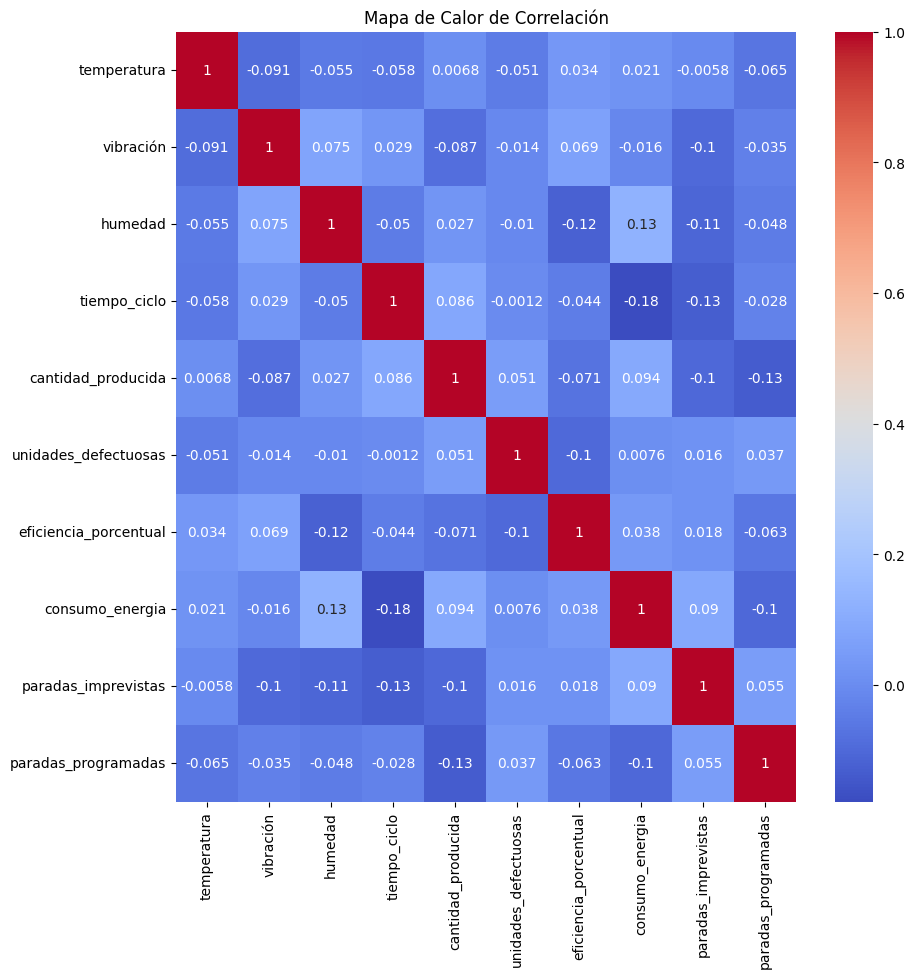

In [ ]:
### MAPA DE CALOR DE LA CORRELACIÓN ENTRE LAS VARIABLES CLAVE

plt.figure(figsize=(10,10))
sns.heatmap(DATOS_PREPARADOS[["temperatura","vibración","humedad","tiempo_ciclo","cantidad_producida","unidades_defectuosas","eficiencia_porcentual","consumo_energia","paradas_imprevistas","paradas_programadas"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlación")
plt.show()
#
#





Es posible entender de los mapas de calor la correlación más alta se4 presenta entre la humedad y el consumo energetico y entre el consumo de energia y el tiempo del ciclo hay existe una correlación inversa importante .

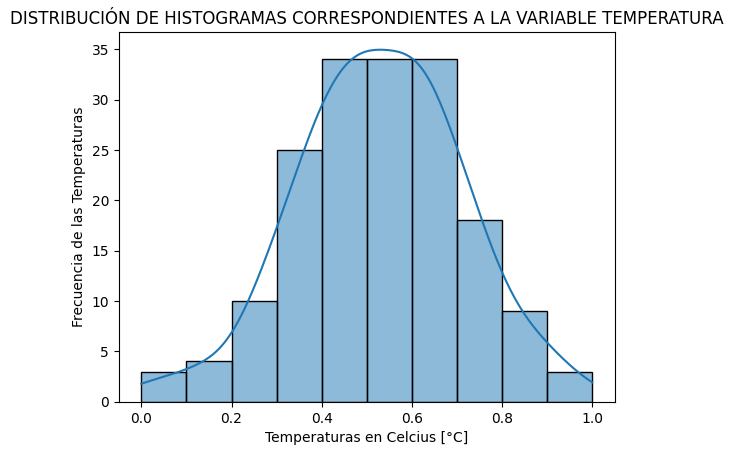

In [ ]:
### PRIORIZANDO LAS VARIABLES DE TEMPERATURA, CONSUMO DE ENERGIA , HUMEDAD Y EFICIENCIA PORCENTUAL.

sns.histplot(DATOS_PREPARADOS["temperatura"],bins=10, kde=True,x="Temperaturas en Celcius [°C]",y="Frecuencia de las Temperaturas" )



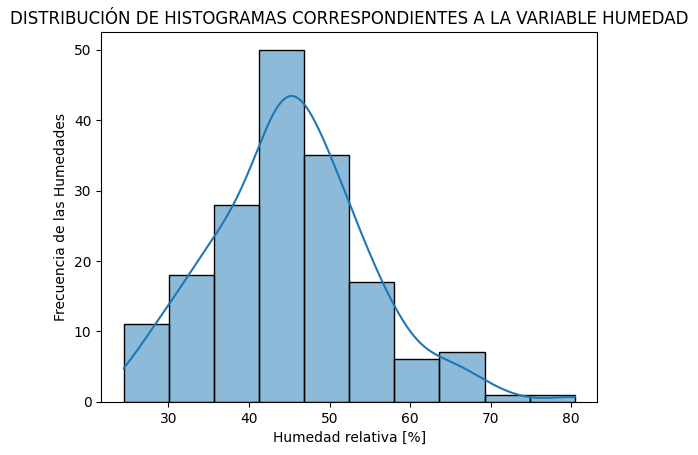

In [ ]:
## variable humedad

sns.histplot(data=DATOS_PREPARADOS, x="humedad", bins=10, kde=True)
plt.xlabel("Humedad relativa [%]")
plt.ylabel("Frecuencia de las Humedades")
plt.title("DISTRIBUCIÓN DE HISTOGRAMAS CORRESPONDIENTES A LA VARIABLE HUMEDAD")
plt.show()


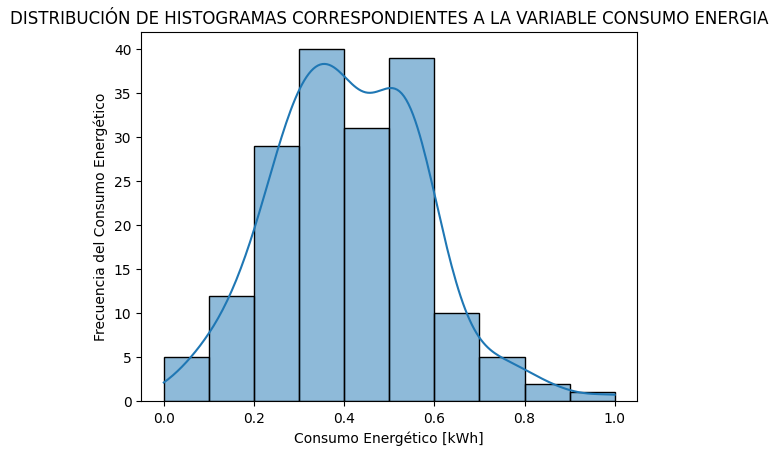

In [ ]:
## variable consumo energetico

sns.histplot(data=DATOS_PREPARADOS, x="consumo_energia", bins=10, kde=True)
plt.xlabel("Consumo Energético [kWh]")
plt.ylabel("Frecuencia del Consumo Energético")
plt.title("DISTRIBUCIÓN DE HISTOGRAMAS CORRESPONDIENTES A LA VARIABLE CONSUMO ENERGIA")
plt.show()
#

In [ ]:
## análisis de correlaciones
corr_vars=DATOS_PREPARADOS[["temperatura","humedad","tiempo_ciclo","eficiencia_porcentual","consumo_energia","paradas_imprevistas",]]
corr_vars.corr()



,temperatura,humedad,tiempo_ciclo,eficiencia_porcentual,consumo_energia,paradas_imprevistas
temperatura,1.000000,-0.055151,-0.057882,0.033740,0.021226,-0.005784
humedad,-0.055151,1.000000,-0.049657,-0.123177,0.128431,-0.110147
tiempo_ciclo,-0.057882,-0.049657,1.000000,-0.044210,-0.179624,-0.133428
eficiencia_porcentual,0.033740,-0.123177,-0.044210,1.000000,0.038066,0.018493
consumo_energia,0.021226,0.128431,-0.179624,0.038066,1.000000,0.090238
paradas_imprevistas,-0.005784,-0.110147,-0.133428,0.018493,0.090238,1.000000


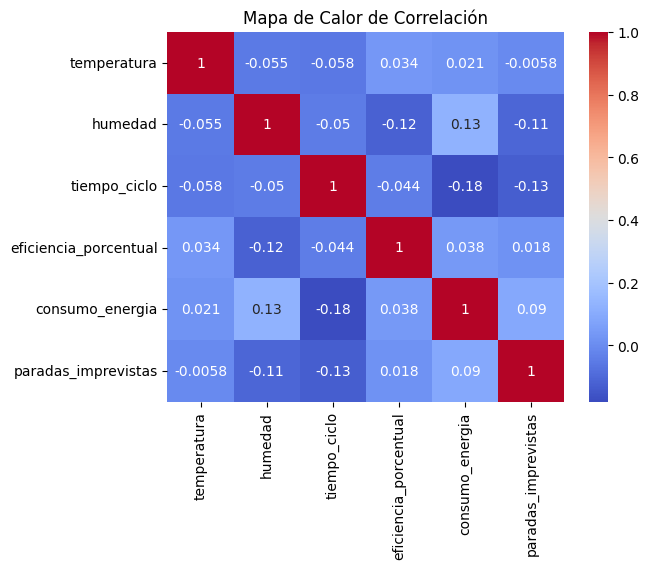

In [ ]:
### Mapa de Calor
sns.heatmap(corr_vars.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlación")
plt.show()

In [ ]:
### Vamos con la selección de caracteristicas y del modelo

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

### variables predictoras y objetivo

x = DATOS_PREPARADOS[["temperatura","humedad","tiempo_ciclo","eficiencia_porcentual","consumo_energia","paradas_imprevistas"]]
y= DATOS_PREPARADOS["cantidad_producida"]

### selección de las mejores variables
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(x,y)

## resultados por relevancia

scores = selector.scores_
feature_names = x.columns

resultados = pd.DataFrame({'Variable': feature_names, 'Puntaje': scores})
resultados = resultados.sort_values(by='Puntaje', ascending=False)

print(resultados)


                Variable   Puntaje
5    paradas_imprevistas  1.896717
4        consumo_energia  1.527896
2           tiempo_ciclo  1.283406
3  eficiencia_porcentual  0.876048
1                humedad  0.126146
0            temperatura  0.007850


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## entrenando el arbol de decisión para medir la importancia

modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(x,y)

importances = modelo_arbol.feature_importances_
feature_names = x.columns

resultados_importancia = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
resultados_importancia = resultados_importancia.sort_values(by='Importancia', ascending=False)

print(resultados_importancia)



                Variable  Importancia
3  eficiencia_porcentual     0.355493
4        consumo_energia     0.251528
0            temperatura     0.165876
2           tiempo_ciclo     0.103632
1                humedad     0.095145
5    paradas_imprevistas     0.028325


/tmp/ipython-input-105-1829007747.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-105-1829007747.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




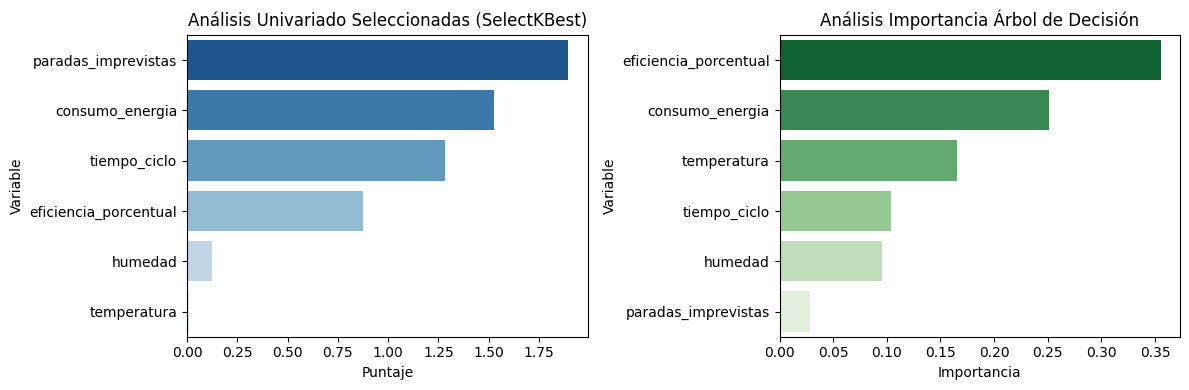

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))


## grafica del SelectKbest (análisis univariado)
sns.barplot(x='Puntaje', y='Variable', data=resultados,ax=ax[0],palette="Blues_r")
ax[0].set_title('Análisis Univariado Seleccionadas (SelectKBest)')




## Grafica de Importancia (árbol decisión)
sns.barplot(x='Importancia', y='Variable', data=resultados_importancia,palette="Greens_r")
ax[1].set_title('Análisis Importancia Árbol de Decisión')



plt.tight_layout()
plt.show()

In [ ]:
### evaluación del modelo predictivo

from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

### cargamos el conjunto de datos original.
datos = DATOS_PREPARADOS



In [ ]:
### slider interactivo para elegir el porcentaje de prueba

slider_test_size = widgets.FloatSlider(
    value=0.2,
    min=0.1,
    max=0.5,
    step=0.01,
    description="set de prueba", conitnuos_update =False)

display(slider_test_size)



FloatSlider(value=0.2, description='set de prueba', max=0.5, min=0.1, step=0.01)

In [ ]:
### función para la división de datos de prueba y datos de entrada para machine learning

def dividir_datos(datos, test_size):
  x = datos[["temperatura","humedad","tiempo_ciclo","eficiencia_porcentual","consumo_energia","paradas_imprevistas"]]
  y = datos["cantidad_producida"]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

  return x_train, x_test, y_train, y_test

## usamos el widget interactivo

widgets.interact(dividir_datos, datos=widgets.fixed(datos), test_size=slider_test_size)

interactive(children=(FloatSlider(value=0.2, description='set de prueba', max=0.5, min=0.1, step=0.01), Output…

<function __main__.dividir_datos(datos, test_size)>

In [ ]:
### damos la división estandar recomendada :  (80% entrenamiento, 20% prueba)

x_train, x_test, y_train, y_test = train_test_split(datos[["temperatura","humedad","tiempo_ciclo","consumo_energia","paradas_imprevistas"]], datos["eficiencia_porcentual"], test_size=0.2, random_state=42)
#

print("conjunto de entrenamiento (primeros registros):")
display(x_train.head())


print("\nConjunto de prueba (primeros registros):")
display(x_test.head())
#
#




conjunto de entrenamiento (primeros registros):


,temperatura,humedad,tiempo_ciclo,consumo_energia,paradas_imprevistas
4533,0.655637,44.881414,110.887460,0.533039,0
5152,0.888018,46.753621,117.976698,0.465588,0
5626,0.610861,29.204299,97.184961,0.353947,1
1628,0.511179,50.973744,105.697025,0.617747,1
5055,0.388904,45.190738,119.912532,0.757774,1



Conjunto de prueba (primeros registros):


,temperatura,humedad,tiempo_ciclo,consumo_energia,paradas_imprevistas
5460,0.440840,53.946455,119.912532,0.374418,1
5218,0.712137,57.329801,95.037362,0.576949,0
3875,0.849249,58.288081,140.177918,0.605009,0
4747,0.721883,50.783162,139.120632,0.362771,0
5064,0.341854,43.264794,111.080321,0.318022,0


In [ ]:
### montamos la regrasión lineal del modelo

from sklearn.model_selection import train_test_split

## CREAR VARIABLE OBJETIVO

datos["eficiencia_predicha"]= modelo_arbol.predict(datos[["temperatura","humedad","tiempo_ciclo","eficiencia_porcentual","consumo_energia","paradas_imprevistas"]])

## DEFINAMOS LAS VARIABLES PREDICTORAS

x= datos[["temperatura","humedad","eficiencia_porcentual","consumo_energia"]]
y= datos["eficiencia_predicha"]

### división estandar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)






In [ ]:
from sklearn.linear_model import LinearRegression

## instancias y entrenamiento de modelo

modelo_rl = LinearRegression()
modelo_rl.fit(x_train, y_train)

print("modelo entrenado exitosamente")

modelo entrenado exitosamente


In [ ]:
### mostrar coeficientes
print(f"Intercepto (b0):{modelo_rl.intercept_}")
print(f"Coeficientes (b1,b2,b3,b4):{modelo_rl.coef_}")

## interpretación amigable

for idx, col_name in enumerate(x_train.columns):
  print(f"El coeficiente para {col_name} es {modelo_rl.coef_[idx]}")

Intercepto (b0):99.0584985909525
Coeficientes (b1,b2,b3,b4):[ 0.57436414  0.05148977 -3.0075142   1.16267681]
El coeficiente para temperatura es 0.5743641419043163
El coeficiente para humedad es 0.05148976854494326
El coeficiente para eficiencia_porcentual es -3.0075142012257396
El coeficiente para consumo_energia es 1.1626768065527484


In [ ]:
### hagamos predicciones

y_pred = modelo_rl.predict(x_test)

# comparación de modelos con valores reales
datos_resultados = x_test.copy()
datos_resultados["eficiencia_porcentual"]= y_test
datos_resultados["eficiencia_predicha"]=y_pred.round(2)

datos_resultados.head(10)


,temperatura,humedad,eficiencia_porcentual,consumo_energia,eficiencia_predicha
5460,0.440840,53.946455,106.0,0.374418,100.30
5218,0.712137,57.329801,93.0,0.576949,101.81
3875,0.849249,58.288081,99.0,0.605009,101.03
4747,0.721883,50.783162,104.0,0.362771,101.08
5064,0.341854,43.264794,86.0,0.318022,100.70
5050,0.393063,38.570032,114.0,0.550083,100.31
1750,0.655392,40.755176,95.0,0.626245,100.01
603,0.543591,50.406627,96.0,0.384791,100.71
4740,0.621308,44.964716,90.0,0.252900,99.95
2537,0.821991,33.714226,102.0,0.255222,99.11


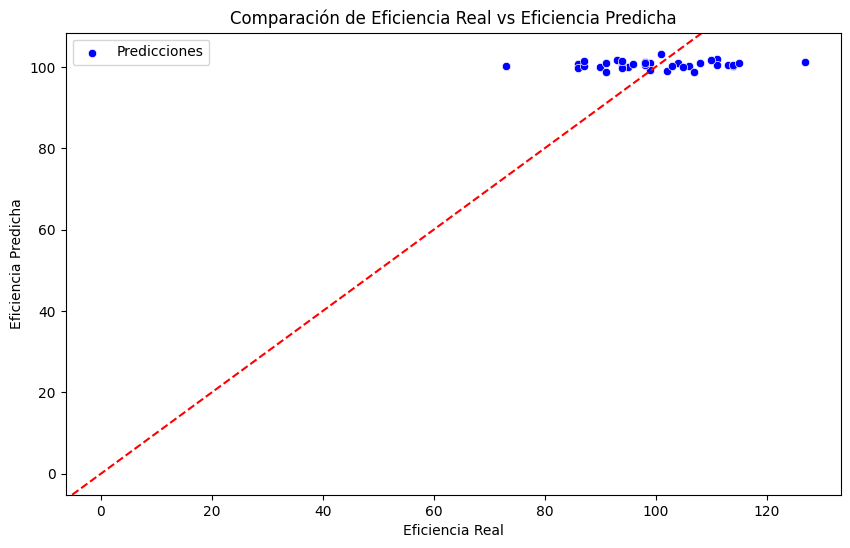

In [ ]:
### gráfico de dispersión de las variables predichas con lineas ideales.
import matplotlib.pyplot as plt

### crear grafico de dispersión.

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicciones")
plt.xlabel("Eficiencia Real")
plt.ylabel("Eficiencia Predicha")
plt.title("Comparación de Eficiencia Real vs Eficiencia Predicha")
plt.axline((0,0),slope=1,color="red",linestyle="--")  ## linea ideal
plt.show()

In [ ]:
###Evaluación del modelo

## Calculo de metricas del modelo

mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
rmse= np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 112.53140202014418
RMSE: 10.608081919939353
R2: 0.013871038882061537


In [ ]:
#### figuras en 3d de relación de las variables

fig = px.scatter_3d(datos, x='temperatura', y='humedad', z='eficiencia_porcentual',
              color='consumo_energia')
fig.show()